In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('data').sheet1

rows = worksheet.get_all_values()

df1 = pd.DataFrame(rows[1:], columns=rows[0])
#df = df.astype({'CGPA':'float'})
df1.head()


,Input,Output
0,10,15
1,20,25
2,30,35
3,40,45
4,50,55


In [2]:
df1=df1.astype({'Input':'float'})
df1=df1.astype({'Output':'float'})

In [3]:
df1.head()

,Input,Output
0,10.0,15.0
1,20.0,25.0
2,30.0,35.0
3,40.0,45.0
4,50.0,55.0


In [4]:
x=df1[['Input']].values
y=df1[['Output']].values

In [5]:
x

array([[ 10.],
       [ 20.],
       [ 30.],
       [ 40.],
       [ 50.],
       [ 60.],
       [ 70.],
       [ 80.],
       [ 90.],
       [100.]])

In [6]:
y

array([[15.],
       [25.],
       [35.],
       [45.],
       [55.],
       [65.],
       [75.],
       [85.],
       [95.],
       [45.]])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=30)

In [10]:
Scaler=MinMaxScaler()
Scaler.fit(x_train)

MinMaxScaler()

In [11]:
x_train1= Scaler.transform(x_train)

In [12]:
model = Sequential([
    Dense(2,activation='relu'),
    Dense(1)
])

In [13]:
model.compile(optimizer='rmsprop', loss= 'mae')

In [21]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 14ms/step - loss: 67.9908
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 67.9898
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 67.9888
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 67.9878
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 67.9868
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 67.9858
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 67.9848
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 67.9838
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 67.9828
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 67.9818
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 67.9808
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 67.9798
Epoch 13/500
1/1 [===========================

In [22]:
loss_df=pd.DataFrame(model.history.history)

In [23]:
import matplotlib

<Axes: >

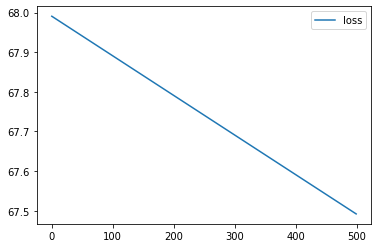

In [24]:
loss_df.plot()

In [25]:
x_Test1= Scaler.transform(x_test)
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 27.4909


27.490856170654297

In [26]:
x_n1=[[4]]
x_n1_1=Scaler.transform(x_n1)

In [27]:
model.predict(x_n1_1)

1/1 [==============================] - 0s 22ms/step


array([[1.4469479]], dtype=float32)